In [13]:
# set the environment path to find Recommenders
import sys
sys.path.append("../../")
print("System version: {}".format(sys.version))

import papermill as pm
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from reco_utils.dataset import movielens

from reco_utils.dataset.wikidata import (search_wikidata,
                                         find_wikidata_id,
                                         query_entity_links,
                                         read_linked_entities,
                                         query_entity_description)

# Select MovieLens data size: 100k, 1m, 10m, or 20m
MOVIELENS_DATA_SIZE = '100k'
MOVIELENS_SAMPLE = True
MOVIELENS_SAMPLE_SIZE = 50



names = ["The Godfather", "Al Pacino", "Tom Hanks", "Forrest Gump", "Julia Roberts", "", "My Best Friend's Wedding"]


System version: 3.8.3 (tags/v3.8.3:6f8c832, May 13 2020, 22:37:02) [MSC v.1924 64 bit (AMD64)]


In [14]:
# the following code has been wrapped in a helper function called search_wikidata()
# it is provided here to show the details of which calls are being made to wikipedia APIs

# capture results as a list of dicts to transform to DataFrame (this is faster than appending to DataFrames)
results_list = []
for idx, name in enumerate(names):
    # first get the wikipedia entity_id for each name
    entity_id = find_wikidata_id(name)
    if entity_id == "entityNotFound":
        continue

    # next we query wikipedia to get entity links
    json_links = query_entity_links(entity_id)

    # the following function extracts entities from the links
    related_links = read_linked_entities(json_links)

    # now we can construct an connection in our graph between two entities
    for related_entity, related_name in related_links:
        result = dict(
            name=name,
            original_entity=entity_id,
            linked_entities=related_entity,
            name_linked_entities=related_name,
        )
        results_list.append(result)

results_list = pd.DataFrame(results_list)
results_list.head()



ENTITY NOT FOUND


,name,original_entity,linked_entities,name_linked_entities
0,The Godfather,Q47703,Q377616,New Hollywood
1,The Godfather,Q47703,Q130232,drama
2,The Godfather,Q47703,Q52207399,film based on a novel
3,The Godfather,Q47703,Q7444356,gangster film
4,The Godfather,Q47703,Q959790,crime film


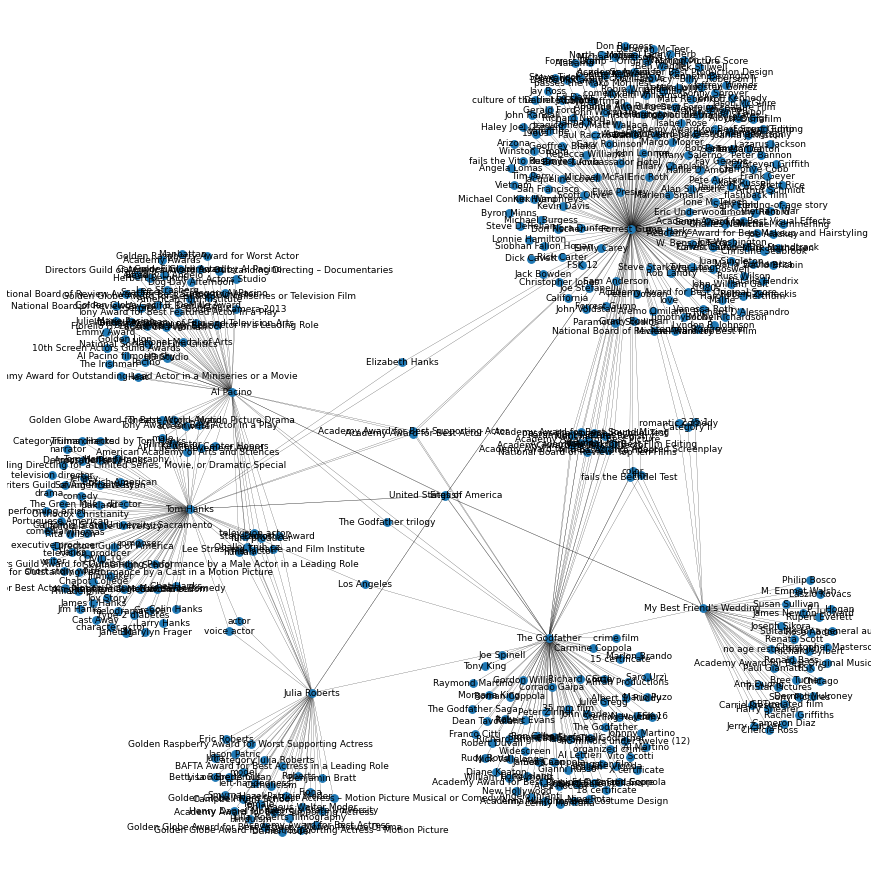

In [15]:
G = nx.from_pandas_edgelist(results_list, 'original_entity', 'linked_entities')

target_names = results_list[["linked_entities", "name_linked_entities"]].drop_duplicates().rename(columns={"linked_entities": "labels", "name_linked_entities": "name"})
source_names = results_list[["original_entity", "name"]].drop_duplicates().rename(columns={"original_entity": "labels"})
names = pd.concat([target_names, source_names])
names = names.set_index("labels")
names = names.to_dict()["name"]

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw(G,pos, node_size=60,font_size=9, width = 0.2)
nx.draw_networkx_labels(G, pos, names, font_size=9)
plt.show()

In [16]:
# Obtain pairs of Movie Title - IDs from Movielens
df = movielens.load_pandas_df(MOVIELENS_DATA_SIZE,
                              ('UserId', 'ItemId', 'Rating', 'Timestamp'),
                             title_col='Title',
                             genres_col='Genres',
                             year_col='Year'
        )
movies = df[["Title", "ItemId"]].drop_duplicates().reset_index()
movies["Title"][0:5]

# For notebook testing
if MOVIELENS_SAMPLE == True:
    movies = movies.head(MOVIELENS_SAMPLE_SIZE)

movies.shape

100%|██████████| 4.81k/4.81k [00:01<00:00, 3.60kKB/s]


(50, 3)

In [17]:
names = [t + ' film' for t in movies['Title']]
result = search_wikidata(names, extras=movies[['Title', 'ItemId']].to_dict())
result.head()

result["Title"].value_counts()
number_movies = len(result["Title"].unique())



# Record results with papermill for unit-tests
pm.record("length_result", number_movies)



ENTITY NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
ENTITY NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
ENTITY NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
ENTITY NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
ENTITY NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
ENTITY NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
ENTITY NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
ENTITY NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
ENTITY NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
ENTITY NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
ENTITY NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
ENTITY NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
ENTITY NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NOT FOUND
ENTITY NOT FOUND
DESCRIPTION NOT FOUND
DESCRIPTION NO

AttributeError: module 'papermill' has no attribute 'record'